In [1]:
#import the required pacakge
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, RobustScaler

# importing ploting libraries
import matplotlib.pyplot as plt   


In [2]:
#to enable the plotting on Jupyter notebook
%matplotlib inline

In [3]:

## load data
prod_df = pd.read_csv('cproducts.csv')
tend_df = pd.read_csv('ctender.csv')



In [4]:
#check the shape of the data
print('prodf has {} rows and {}   columns '.format(prod_df.shape[0],prod_df.shape[1]))
print('tend_df has {} rows and {} column '.format(tend_df.shape[0],tend_df.shape[1]))

prodf has 11972 rows and 16   columns 
tend_df has 149752 rows and 13 column 


In [5]:
#just check the data types of the prod_df and tend_df
print ('Product data structure')
print prod_df.dtypes
print('*********************************************')
print('tend data structure')
print tend_df.dtypes

Product data structure
customerID                     object
DOB                            object
Gender                         object
State                          object
PinCode                       float64
transactionDate                object
store_code                      int64
store_description              object
till_no                         int64
transaction_number_by_till      int64
promo_code                     object
promotion_description          object
product_code                    int64
product_description            object
sale_price_after_promo        float64
discountUsed                   object
dtype: object
*********************************************
tend data structure
customerID                     object
DOB                            object
Gender                         object
State                          object
PinCode                       float64
transactionDate                object
store_code                      int64
store_description      

In [6]:
#just will have glance of data 
prod_df.head(5)

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,BBID_20482,1975-10-20,male,MADHYA PRADESH,453441.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,NaN,1000446431,PATANJALI CHOCOS 125g,55.00,Payback
1,BBID_20485,1955-07-21,female,NaN,999999.0,2017-03-09,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,NaN,1000010431,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback
2,BBID_20498,1981-03-19,female,MAHARASHTRA,400064.0,2015-08-12,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,0000971754,AD 399 FLAT LADIES JEANS FASHION EXC,1000077851005,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback
3,BBID_20499,1986-05-10,male,MAHARASHTRA,400099.0,2016-12-18,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,NaN,1000443231,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback
4,BBID_204110,1988-02-29,male,MADHYA PRADESH,474001.0,2015-12-31,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,0000974126,NMP 5% OFF CONCEPT DISCOUNT 2655,300481741,MAGGI NDL MERI MASALA PP 70g,34.20,Payback


In [7]:
tend_df.head(5)

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,tender_type,transaction_number_by_till,payment_amount_by_tender,PaymentUsed
0,BBID_2044,1984-04-02,male,NaN,626125.0,2015-09-03,4986,BB-MADURAI-KOCHADAI VILLAGE,22,GVOWN,9208,1000.00,GiftVoucher
1,BBID_2044,1984-04-02,male,NaN,626125.0,2015-09-03,4986,BB-MADURAI-KOCHADAI VILLAGE,22,CASH,9208,10.46,CASH
2,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,EDCAXIS,90269,677.28,AXIS
3,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,MOBI,90268,1042.00,One MobiKwik Systems
4,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,MOBI,90269,1000.00,One MobiKwik Systems


$ Few info about the data , just for the understanding of the data 

Future Group has taken the customers relation to next level by introducing the loyality program .
With this loyality program customer can accumulate point with online and offline partner using a single card .
Customers can accumulate points across Future Group formats(home town ,bog bazar,ezone,brand factory ,central etc.) , thereby making “shopping rewarding”.

 It is having many  loyality program 
 
1.Payback -PAYBACK is Europe's leading customer loyalty program, headquartered in Germany , with a total of 25.5 million active cardholders in Germany and Poland. In India, PAYBACK consolidated its position after taking a major stake in I-Mint. Today, with more than 30 partners with 1,500 outlets and 10 million card members, it’s the only program which works with market leading pan-India players from the banking, travel, petroleum and online sectors such as ICICI Bank, HPCL, Univercell, BookMyShow and MakeMyTrip.

Now that Future Group has become a part of this bandwagon, customers are bound to earn points at every step – from formats like Big Bazaar, Food Bazaar, Central, HomeTown, Ezone, Brand Factory and Future Bazaar.
These points can then be redeemed for air miles, movie tickets, air tickets and vice versa.

With Future Group and PAYBACK “Shopping is Rewarding”.


2.T24- will provide customers with a dual advantage all 24 hours of the day—‘Shop More, Talk More’ and ‘Talk More, Shop More’.
Customers will get shopping benefits for talking and talk-time benefits each time they shop.

3.Big Bazaar Profit Club- This is kind of membership program where user can pay 10000 and then shop 1000 each month for 12 months .Benefitting 2000 shoping in  a year.

Members of the Big Bazaar PROFIT CLUB will also receive the benefit of existing offers on their Payback cards and T24 mobile services.

4.Easyday Savings Club 

5.Future Pay mobile wallet 


Along with the loyality program  few festive offer also there time to time 

1. wednesday bazar
2. Mahabchat offer during 24-26 Jan
3. The Great Excahange Offer 

here data is availbale in two file product and tender.csv

$ Product.csv contains the list of user along with the product in which customer got discount for particular transaction

$ Tender.csv contain contains mainly about the mode of payment done for particular transaction like cash ,gift vouchers etc.

Points understood so far 

1. As i understood all the transaction listed in product.csv must present in tender.csv , will check it later 

2. Tender_Type and PaymentMode of tender.csv contains the same info its like redundant column 

3. As per the question "Predict the cluster Based on the store-location " so here store-code serves for store location so here instead  of store-location ,store-desription ,state ,Pin Code we can use only store-code rest of the thing is not much required what i feel

4.  Since Clustering should here consider only the behaviour of customer whch here can be identified with the mode of payment and type of discount used and how much they spent will be meaningful 

I am not confident enough in using promo_code,PromoDescription,Sale_price_after_Discount 

And  customerID, transactionDate,till No(billing counter number ),transaction_Number_by_till may not be significant 

So Final conclusion on importance of  variable based on my understanding will be  DOB (Age can be derived) ,Gender,Discount_used ,Mode Of payment ,Payment Amount can be significant 

 $ if all the product.csv is available in tender.csv ,later point i will merge



Start with basic thing and using the sample code which is available for this clustering

##Also can see NANA value In DOB which i will replace with nan value 


In [8]:
#replace all the NANA of DOB value to Null or Nan

prod_df['DOB']=prod_df['DOB'].replace('NANA', np.nan)


tend_df['DOB']=tend_df['DOB'].replace('NANA', np.nan)

In [9]:
# check if any missing number in both the data

prod_df.isnull().sum()


customerID                       0
DOB                            473
Gender                        1028
State                         1583
PinCode                        817
transactionDate                  0
store_code                       0
store_description                0
till_no                          0
transaction_number_by_till       0
promo_code                       0
promotion_description         8510
product_code                     0
product_description              0
sale_price_after_promo           0
discountUsed                     0
dtype: int64

In [10]:
#check if any missing number in present in the tender data 
#check the NAN value in the train data set 
tend_df.isnull().sum()


customerID                        0
DOB                            4630
Gender                         6663
State                         11650
PinCode                        5564
transactionDate                   0
store_code                        0
store_description                 0
till_no                           0
tender_type                       0
transaction_number_by_till        0
payment_amount_by_tender          0
PaymentUsed                    1223
dtype: int64

#### Feature Enginerring planned for Product_df
1. Get transaction Id
2. Get Age From Date of Birth
3. Get Day of shopping
4. get the Discount used value split up before merging 


looks like few are repeting
check the repeting value

In [11]:
# get Transaction ID
#check here the repetiotion of customer and then create new column TransactionId which will be the combination of store_code_tillno and transaction nukber

def createTransactionID(store_code,till_no,trans_no):
    transaction_ID='{}-{}-{}'.format(str(store_code),str(till_no),str(trans_no))
    return transaction_ID

In [12]:
prod_df['Transaction_ID']=prod_df.apply(lambda  row: createTransactionID(row['store_code'],row['till_no'],row['transaction_number_by_till']),axis=1)

In [13]:
prod_df['Transaction_ID'].nunique()

11775

In [14]:

#just to verify one transaction Id is having one date find the duplicates   so that i can safely merge both the df  based on transaction ID 
prod_df_dupli = prod_df[prod_df.Transaction_ID.duplicated(keep=False)]

In [15]:
prod_df_dupli

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed,Transaction_ID
38,BBID_204891,1967-09-23,male,MADHYA PRADESH,452010.0,2015-11-03,2655,BB-INDORE-MALHAR MEGA MALL,4,18925,NONPROMO,NaN,108032496,SAFAL PEAS GREEN PEAS 200G,45.00,Payback,2655-4-18925
39,BBID_204891,1967-09-23,male,MADHYA PRADESH,452010.0,2015-11-03,2655,BB-INDORE-MALHAR MEGA MALL,4,18925,0001041645,"AZ 1@10,2@30 RS OFF Frozen Veg Snacks FB",300658528,MCCAIN FROZ VEG SNACK SMILES 175g,50.00,Payback,2655-4-18925
125,BBID_2042009,1961-09-16,female,NaN,999999.0,2017-05-26,2655,BB-INDORE-MALHAR MEGA MALL,7,99019,NONPROMO,NaN,300455123,ODONIL TLT FRSH BLK MIX CP 75g 3+1,192.00,Payback,2655-7-99019
126,BBID_2042009,1961-09-16,female,NaN,999999.0,2017-05-26,2655,BB-INDORE-MALHAR MEGA MALL,7,99019,NONPROMO,NaN,108023044,EVERYDAY MILKPOW DAIRY WHITNER PP 400g,178.00,Payback,2655-7-99019
207,BBID_2043403,1971-07-27,female,MADHYA PRADESH,452010.0,2017-02-17,2655,BB-INDORE-MALHAR MEGA MALL,11,80640,NONPROMO,NaN,1000646078,CHUPA CHUPS SOUR BITE MIXED FRUIT 61.6gm,30.00,Payback,2655-11-80640
208,BBID_2043403,1971-07-27,female,MADHYA PRADESH,452010.0,2017-02-17,2655,BB-INDORE-MALHAR MEGA MALL,11,80640,NONPROMO,NaN,1000564585,WB-1118 6 pcs Baby Fork Set,390.00,Payback,2655-11-80640
287,BBID_2044774,1977-10-03,male,NaN,243001.0,2017-01-26,2655,BB-INDORE-MALHAR MEGA MALL,11,77651,NONPROMO,NaN,1000446348,PATANJALI SUN SCREEN CREAM SPF30 50g,100.00,Payback,2655-11-77651
288,BBID_2044774,1977-10-03,male,NaN,243001.0,2017-01-26,2655,BB-INDORE-MALHAR MEGA MALL,11,77651,NONPROMO,NaN,108022599,DUKES WFR BISC VANILLA WAFFY 75g,40.00,Payback,2655-11-77651
320,BBID_2045292,1989-05-23,female,UTTAR PRADESH,211006.0,2016-10-03,3692,BB-LUDHIANA-FEROZEPUR-MF,5,65290,NONPROMO,NaN,1000217095,Panama Mat-Half circle pointers,149.00,Payback,3692-5-65290
321,BBID_2045292,1989-05-23,female,UTTAR PRADESH,211006.0,2016-10-03,3692,BB-LUDHIANA-FEROZEPUR-MF,5,65290,NONPROMO,NaN,300943307,PARLE CRM BIS H&S FAB ORANGE PP 100g,25.00,Payback,3692-5-65290


In [16]:
#get Day of Shopping
#find the day of week based on dates First convert the trasactionDate into dateTime as as of now it is Object to retrive the day 
#
prod_df['transactionDate']=prod_df['transactionDate'].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%Y/%m/%d'))


In [17]:
prod_df.dtypes

customerID                            object
DOB                                   object
Gender                                object
State                                 object
PinCode                              float64
transactionDate               datetime64[ns]
store_code                             int64
store_description                     object
till_no                                int64
transaction_number_by_till             int64
promo_code                            object
promotion_description                 object
product_code                           int64
product_description                   object
sale_price_after_promo               float64
discountUsed                          object
Transaction_ID                        object
dtype: object

In [18]:
#create new column Day whih will tell which day shopping has been done
import datetime
def getDayOfShpping(date):
    #days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    dayNumber=date.weekday()
    return dayNumber

In [19]:
prod_df['DayOfshopping']=prod_df['transactionDate'].apply(lambda date:getDayOfShpping(date))


In [20]:
#number of unique value is less than number of actual value so looks like few transaction are repetinng 
#will check later
prod_df.dtypes

customerID                            object
DOB                                   object
Gender                                object
State                                 object
PinCode                              float64
transactionDate               datetime64[ns]
store_code                             int64
store_description                     object
till_no                                int64
transaction_number_by_till             int64
promo_code                            object
promotion_description                 object
product_code                           int64
product_description                   object
sale_price_after_promo               float64
discountUsed                          object
Transaction_ID                        object
DayOfshopping                          int64
dtype: object

In [21]:
prod_df.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed,Transaction_ID,DayOfshopping
0,BBID_20482,1975-10-20,male,MADHYA PRADESH,453441.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,NaN,1000446431,PATANJALI CHOCOS 125g,55.00,Payback,2655-2-85246,6
1,BBID_20485,1955-07-21,female,NaN,999999.0,2017-03-09,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,NaN,1000010431,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback,2655-8-78829,3
2,BBID_20498,1981-03-19,female,MAHARASHTRA,400064.0,2015-08-12,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,0000971754,AD 399 FLAT LADIES JEANS FASHION EXC,1000077851005,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback,2655-13-1064,2
3,BBID_20499,1986-05-10,male,MAHARASHTRA,400099.0,2016-12-18,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,NaN,1000443231,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback,2615-14-51080,6
4,BBID_204110,1988-02-29,male,MADHYA PRADESH,474001.0,2015-12-31,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,0000974126,NMP 5% OFF CONCEPT DISCOUNT 2655,300481741,MAGGI NDL MERI MASALA PP 70g,34.20,Payback,2655-9-21911,3


In [22]:
#get the Age from DOB
#first convert into the dateTimeFormat
prod_df['DOB']=prod_df['DOB'].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%Y/%m/%d'))

In [23]:
import datetime as DT
def calculateAge(dob):
    currDate =pd.Timestamp(DT.datetime.now())
    age =currDate.year - dob.year - ((currDate.month, currDate.day) < (dob.month, dob.day)) #condition will return 0 or if current month is less than current  year 
#    print age
    return age

In [24]:
#create new column of age 
prod_df['Age'] = prod_df['DOB'].apply(lambda x:calculateAge(x))

In [25]:
#4.Find the encoded data 

#discount used how to convert into numeric
#following type of discount has been used
#BBProfitClub,
#Payback
#BBSavingsClub
#T24Club
#FGShoppingFest
#FuturePrivilegeClub
#as a customer can do multiple transaction so here considering Transaction_ID is more reliable as discount used per transaction
prod_discount_series = prod_df.set_index('Transaction_ID').discountUsed.str.split(',', expand=True).stack()

In [26]:
prod_discount_df=pd.get_dummies(prod_discount_series, prefix='dt').groupby('Transaction_ID').sum()

In [27]:
#prod_discount_df['customerID']=prod_discount_df.index

prod_discount_df.reset_index(inplace=True)


In [28]:
prod_discount_df

,Transaction_ID,dt_BBProfitClub,dt_BBSavingsClub,dt_FGShoppingFest,dt_FuturePrivilegeClub,dt_Payback,dt_T24Club
0,2615-1-10544,0,0,1,0,0,0
1,2615-1-11267,0,0,1,0,0,0
2,2615-1-12196,0,0,1,0,0,0
3,2615-1-13425,1,0,0,0,1,0
4,2615-1-15569,1,0,0,0,0,0
5,2615-1-20506,1,0,0,0,0,0
6,2615-1-23445,1,0,0,0,0,0
7,2615-1-2547,1,0,0,0,0,0
8,2615-1-27144,0,0,0,0,1,0
9,2615-1-27939,1,0,0,0,0,0


In [29]:
prod_total_df = pd.merge(prod_df,prod_discount_df,how='outer',left_on=('Transaction_ID'), right_on = ('Transaction_ID'))


In [30]:
prod_total_df.shape

(11972, 25)

As of now i will consider only few feature 

customerID    //only for merging the          
Gender  ,age                             
store_code                             
discountUsed                          object
Transaction_ID                        object
DayOfshopping                         object

take new data frame from prod_df and then create new column for discount used 


In [31]:
prod_mod_df=prod_total_df[['customerID','Gender','Age','store_code','Transaction_ID','DayOfshopping','dt_BBProfitClub',
'dt_BBSavingsClub',
'dt_FGShoppingFest',
'dt_FuturePrivilegeClub',
'dt_Payback',
'dt_T24Club']]

In [32]:
prod_mod_df.head(5)

,customerID,Gender,Age,store_code,Transaction_ID,DayOfshopping,dt_BBProfitClub,dt_BBSavingsClub,dt_FGShoppingFest,dt_FuturePrivilegeClub,dt_Payback,dt_T24Club
0,BBID_20482,male,42.0,2655,2655-2-85246,6,0,0,0,0,1,0
1,BBID_20485,female,62.0,2655,2655-8-78829,3,0,0,0,0,1,0
2,BBID_20498,female,36.0,2655,2655-13-1064,2,0,0,0,0,1,0
3,BBID_20499,male,31.0,2615,2615-14-51080,6,0,0,0,0,1,0
4,BBID_204110,male,29.0,2655,2655-9-21911,3,0,0,0,0,1,0


##### feature Engineeing for tend_df 

1.get transactionId
2.get Age,
3.get Shopping Day
4.covert all the values in to codes

In [33]:
#create the transaction Id forTend_df
tend_df['Transaction_ID']=tend_df.apply(lambda  row: createTransactionID(row['store_code'],row['till_no'],row['transaction_number_by_till']),axis=1)

In [34]:
#get Age from DOB first convert into dateTime and then calculate Age
tend_df['DOB']=tend_df['DOB'].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%Y/%m/%d'))

In [35]:
#create new column of age 
tend_df['Age'] = tend_df['DOB'].apply(lambda x:calculateAge(x))

In [36]:
#3.get the day of shopping
tend_df['transactionDate']=tend_df['transactionDate'].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%Y/%m/%d'))
tend_df['DayOfshopping']=tend_df['transactionDate'].apply(lambda date:getDayOfShpping(date))

In [37]:
#just to verify
tend_df.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,tender_type,transaction_number_by_till,payment_amount_by_tender,PaymentUsed,Transaction_ID,Age,DayOfshopping
0,BBID_2044,1984-04-02,male,NaN,626125.0,2015-09-03,4986,BB-MADURAI-KOCHADAI VILLAGE,22,GVOWN,9208,1000.00,GiftVoucher,4986-22-9208,33.0,3
1,BBID_2044,1984-04-02,male,NaN,626125.0,2015-09-03,4986,BB-MADURAI-KOCHADAI VILLAGE,22,CASH,9208,10.46,CASH,4986-22-9208,33.0,3
2,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,EDCAXIS,90269,677.28,AXIS,4986-19-90269,33.0,6
3,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,MOBI,90268,1042.00,One MobiKwik Systems,4986-19-90268,33.0,6
4,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,MOBI,90269,1000.00,One MobiKwik Systems,4986-19-90269,33.0,6


In [38]:
#keeping only few  column cutomerId,Gender,Age,store_code,Transaction_ID,PaymentUsed,payment_amount_by_tender
tend_mod_df=tend_df[['customerID','Gender','Age','store_code','Transaction_ID','tender_type','payment_amount_by_tender','DayOfshopping']]

In [39]:
tend_mod_df.head(20)

,customerID,Gender,Age,store_code,Transaction_ID,tender_type,payment_amount_by_tender,DayOfshopping
0,BBID_2044,male,33.0,4986,4986-22-9208,GVOWN,1000.00,3
1,BBID_2044,male,33.0,4986,4986-22-9208,CASH,10.46,3
2,BBID_2044,male,33.0,4986,4986-19-90269,EDCAXIS,677.28,6
3,BBID_2044,male,33.0,4986,4986-19-90268,MOBI,1042.00,6
4,BBID_2044,male,33.0,4986,4986-19-90269,MOBI,1000.00,6
5,BBID_2044,male,33.0,4986,4986-13-76316,GVOWN,1000.00,6
6,BBID_2044,male,33.0,4986,4986-13-76316,MOBI,3490.25,6
7,BBID_2044,male,33.0,4986,4986-8-33189,MOBI,672.00,0
8,BBID_2044,male,33.0,4986,4986-13-16808,GVOWN,500.00,6
9,BBID_2044,male,33.0,4986,4986-13-16808,EDCSBI,1196.24,6


In [40]:
#merge both the data to get the complete  customer data
customer_df = pd.merge(tend_mod_df,prod_mod_df,how='outer',left_on=['customerID','Gender','Age','store_code','Transaction_ID','DayOfshopping'], right_on = ['customerID','Gender','Age','store_code','Transaction_ID','DayOfshopping'])



In [41]:
customer_df.head(30)

,customerID,Gender,Age,store_code,Transaction_ID,tender_type,payment_amount_by_tender,DayOfshopping,dt_BBProfitClub,dt_BBSavingsClub,dt_FGShoppingFest,dt_FuturePrivilegeClub,dt_Payback,dt_T24Club
0,BBID_2044,male,33.0,4986,4986-22-9208,GVOWN,1000.00,3,NaN,NaN,NaN,NaN,NaN,NaN
1,BBID_2044,male,33.0,4986,4986-22-9208,CASH,10.46,3,NaN,NaN,NaN,NaN,NaN,NaN
2,BBID_2044,male,33.0,4986,4986-19-90269,EDCAXIS,677.28,6,NaN,NaN,NaN,NaN,NaN,NaN
3,BBID_2044,male,33.0,4986,4986-19-90269,MOBI,1000.00,6,NaN,NaN,NaN,NaN,NaN,NaN
4,BBID_2044,male,33.0,4986,4986-19-90268,MOBI,1042.00,6,NaN,NaN,NaN,NaN,NaN,NaN
5,BBID_2044,male,33.0,4986,4986-13-76316,GVOWN,1000.00,6,NaN,NaN,NaN,NaN,NaN,NaN
6,BBID_2044,male,33.0,4986,4986-13-76316,MOBI,3490.25,6,NaN,NaN,NaN,NaN,NaN,NaN
7,BBID_2044,male,33.0,4986,4986-8-33189,MOBI,672.00,0,NaN,NaN,NaN,NaN,NaN,NaN
8,BBID_2044,male,33.0,4986,4986-13-16808,GVOWN,500.00,6,0.0,0.0,0.0,0.0,1.0,1.0
9,BBID_2044,male,33.0,4986,4986-13-16808,EDCSBI,1196.24,6,0.0,0.0,0.0,0.0,1.0,1.0


In [42]:
customer_df.shape

(151128, 14)

#### check and fill missing value 

In [43]:
customer_df.isnull().sum()

customerID                       0
Gender                        7225
Age                           4796
store_code                       0
Transaction_ID                   0
tender_type                   1139
payment_amount_by_tender      1139
DayOfshopping                    0
dt_BBProfitClub             135523
dt_BBSavingsClub            135523
dt_FGShoppingFest           135523
dt_FuturePrivilegeClub      135523
dt_Payback                  135523
dt_T24Club                  135523
dtype: int64

In [44]:
customer_df.dtypes

customerID                   object
Gender                       object
Age                         float64
store_code                    int64
Transaction_ID               object
tender_type                  object
payment_amount_by_tender    float64
DayOfshopping                 int64
dt_BBProfitClub             float64
dt_BBSavingsClub            float64
dt_FGShoppingFest           float64
dt_FuturePrivilegeClub      float64
dt_Payback                  float64
dt_T24Club                  float64
dtype: object

In [45]:
#before filling missing value convert into codes for gender and payment coded
#using label Encoder 
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
customer_df['Gender'] = lbl.fit_transform(customer_df['Gender'])
customer_df['Gender'].unique()


C:\Users\Ravi\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


array([2, 1, 0], dtype=int64)

In [46]:
#from above looks like 1 for female and 2 for male and 0 for null value 

In [47]:
#now change for tender type
customer_df['tender_type'] = lbl.fit_transform(customer_df['tender_type'])
customer_df['tender_type'].unique()

array([30,  7, 19, 35, 22, 24, 21, 23, 41, 28, 14, 20, 39, 44, 37, 42, 16,
       15,  1, 31, 34,  8, 38,  5, 18,  4, 12, 10, 33, 13, 43, 36, 32,  3,
       27,  2, 40, 29, 11,  6, 26, 17, 25,  9, 45,  0], dtype=int64)

In [48]:
#in total 45 types of cash payment mode 
#now again check the types and fill the missing based on mode 
customer_df.dtypes

customerID                   object
Gender                        int64
Age                         float64
store_code                    int64
Transaction_ID               object
tender_type                   int64
payment_amount_by_tender    float64
DayOfshopping                 int64
dt_BBProfitClub             float64
dt_BBSavingsClub            float64
dt_FGShoppingFest           float64
dt_FuturePrivilegeClub      float64
dt_Payback                  float64
dt_T24Club                  float64
dtype: object

In [49]:
#now fill the missing values first the check the spread of the data 
customer_df.describe()

,Gender,Age,store_code,tender_type,payment_amount_by_tender,DayOfshopping,dt_BBProfitClub,dt_BBSavingsClub,dt_FGShoppingFest,dt_FuturePrivilegeClub,dt_Payback,dt_T24Club
count,151128.000000,146332.000000,151128.000000,151128.000000,149989.000000,151128.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000
mean,1.672999,42.432974,4085.885845,18.828496,1518.528912,3.462026,0.270298,0.031400,0.066069,0.001346,0.828004,0.252740
std,0.561861,13.073782,1017.407271,11.710150,2036.264227,2.032969,0.460562,0.180896,0.261481,0.036661,0.444595,0.452513
min,0.000000,9.000000,2615.000000,0.000000,-28990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,33.000000,2655.000000,7.000000,299.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,41.000000,4796.000000,20.000000,837.850000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,50.000000,4843.000000,23.000000,2008.020000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.000000,108.000000,4986.000000,45.000000,65635.400000,6.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000


In [50]:
#from above gender median in 2 and tender_type is 20 so fill the missing values ,age is 41 
#for gender
customer_df['Gender']=customer_df['Gender'].replace(np.nan,2 )
customer_df['Age']=customer_df['Age'].replace(np.nan,41)
customer_df['tender_type']=customer_df['tender_type'].replace(np.nan,20)
customer_df['payment_amount_by_tender']=customer_df['payment_amount_by_tender'].replace(np.nan,837.85)

#every where elese assign 0 inplace np.nana




In [51]:
customer_df['dt_BBProfitClub']=customer_df['dt_BBProfitClub'].replace(np.nan,0 )
customer_df['dt_BBSavingsClub']=customer_df['dt_BBSavingsClub'].replace(np.nan,0 )
customer_df['dt_FGShoppingFest']=customer_df['dt_FGShoppingFest'].replace(np.nan,0 )
customer_df['dt_FuturePrivilegeClub']=customer_df['dt_FuturePrivilegeClub'].replace(np.nan,0 )
customer_df['dt_Payback']=customer_df['dt_Payback'].replace(np.nan,0 )
customer_df['dt_T24Club']=customer_df['dt_T24Club'].replace(np.nan,0 )




In [52]:
#verify again if any null value is present again
customer_df.isnull().sum()

customerID                  0
Gender                      0
Age                         0
store_code                  0
Transaction_ID              0
tender_type                 0
payment_amount_by_tender    0
DayOfshopping               0
dt_BBProfitClub             0
dt_BBSavingsClub            0
dt_FGShoppingFest           0
dt_FuturePrivilegeClub      0
dt_Payback                  0
dt_T24Club                  0
dtype: int64

#### All null done no null :) let us try elbow method to find the efficient number of cluster


In [53]:
stores = list(set(customer_df['store_code']))

In [54]:
stores

[4843, 3692, 2615, 4986, 4796, 2906, 2655]

In [55]:
def findCluster(scaled_df):
    cluster_range = range( 1, 15)
    cluster_errors = []
    for num_clusters in cluster_range:
        clusters = KMeans( num_clusters, n_init = 5 )
        clusters.fit(scaled_df)
        labels = clusters.labels_
        centroids = clusters.cluster_centers_
        cluster_errors.append( clusters.inertia_ )
    clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
    clusters_df[0:14]
    return clusters_df

In [56]:
#ploting the cluster with elbow method
def plotCluster(num_clusters,cluster_errors):
    plt.figure(figsize=(12,6))
    plt.plot( num_clusters,cluster_errors, marker = "o" )
    
    

There are 7 seven stores ,cluster should be formed as per clusters 
Apply findCluster to find the appropriate cluster and assign the label
[4843, 3692, 2615, 4986, 4796, 2906, 2655]

In [78]:
#Array to store the label for whole data
cluster_labels = []
cluster_store = []
cluster_data = []
cluster_customers = []
cluster_score = []

# 4986

In [58]:
#above mentioned are seven store 
#will do it separately as speed of the computer  is less

cld_4986 = customer_df[customer_df['store_code'] == 4986]
cluster_customers.append(cld_4986['customerID'])


In [59]:
cld_4986.drop(['Gender','Age','store_code','customerID','Transaction_ID'], axis=1, inplace=True)

C:\Users\Ravi\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
#scale the reamining data 
rbs = RobustScaler()
cld_4986_scaled = rbs.fit_transform(cld_4986)

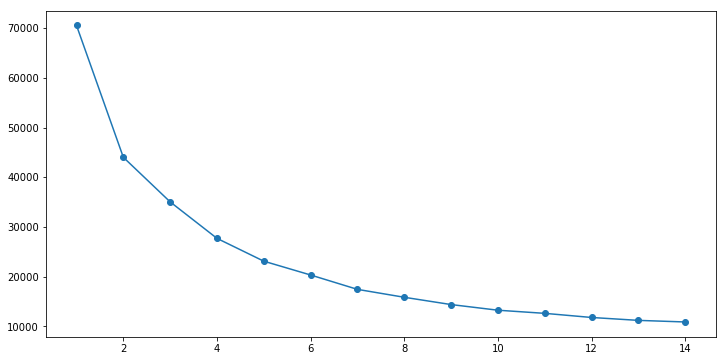

In [62]:
cluster_4986_df=findCluster(cld_4986_scaled)
plotCluster(cluster_4986_df.num_clusters,cluster_4986_df.cluster_errors)

#### optimal number of cluster looks like here 4 or 5

In [63]:
#apply elbow method to find the particular cluster     
km1_4986 = KMeans(n_clusters=4)
km2_4986 = km1_4986.fit(cld_4986_scaled)
label = km2_4986.predict(cld_4986_scaled)

In [64]:
label

array([3, 1, 3, ..., 1, 1, 1])

In [65]:
cluster_labels.append(label)

In [68]:
cluster_store.append(np.repeat(4986, cld_4986.shape[0]))

In [69]:
cluster_data.append(cld_4986)

In [70]:
cluster_data

[        tender_type  payment_amount_by_tender  DayOfshopping  dt_BBProfitClub  \
 0                30                   1000.00              3              0.0   
 1                 7                     10.46              3              0.0   
 2                19                    677.28              6              0.0   
 3                35                   1000.00              6              0.0   
 4                35                   1042.00              6              0.0   
 5                30                   1000.00              6              0.0   
 6                35                   3490.25              6              0.0   
 7                35                    672.00              0              0.0   
 8                30                    500.00              6              0.0   
 9                22                   1196.24              6              0.0   
 10               35                   1018.00              6              0.0   
 11             

### 4843

In [71]:
cld_4843 = customer_df[customer_df['store_code'] == 4843]
cluster_customers.append(cld_4843['customerID'])

In [72]:
cld_4843.drop(['Gender','Age','store_code','customerID','Transaction_ID'], axis=1, inplace=True)

C:\Users\Ravi\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
#scale the reamining data 
rbs = RobustScaler()
cld_4843_scaled = rbs.fit_transform(cld_4843)

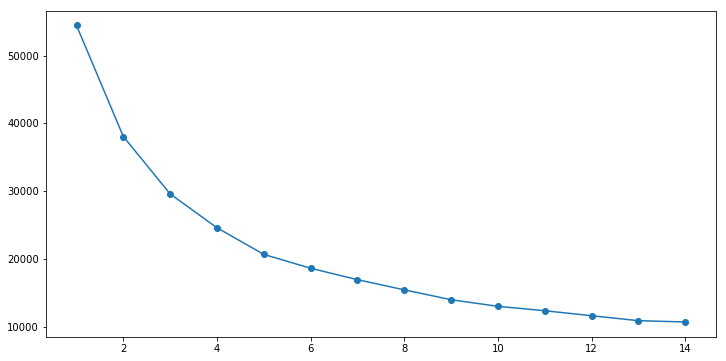

In [74]:
cluster_4843_df=findCluster(cld_4843_scaled)
plotCluster(cluster_4843_df.num_clusters,cluster_4843_df.cluster_errors)

In [ ]:
cld.drop(['Gender','Age','store_code','customerID','Transaction_ID'], axis=1, inplace=True)
    
rbs = RobustScaler()
cld2 = rbs.fit_transform(cld)
    
km1 = KMeans(n_clusters=3)
km2 = km1.fit(cld2)
label = km2.predict(cld2)
    
   # s_score = silhouette_score(cld2, label)
   # cluster_score.append(s_score)
    
cluster_labels.append(label)
cluster_store.append(np.repeat(x, cld.shape[0]))
cluster_data.append(cld2)

In [79]:

for x in stores:
    cld = customer_df[customer_df['store_code'] ==x ]
    cluster_customers.append(cld['customerID'])
    cld.drop(['Gender','Age','store_code','customerID','Transaction_ID'], axis=1, inplace=True)
    
    rbs = RobustScaler()
    cld2 = rbs.fit_transform(cld)
    
    km1 = KMeans(n_clusters=4)
    km2 = km1.fit(cld2)
    label = km2.predict(cld2)
    
   # s_score = silhouette_score(cld2, label)
   # cluster_score.append(s_score)
    
    cluster_labels.append(label)
    cluster_store.append(np.repeat(x, cld.shape[0]))
    cluster_data.append(cld2)

C:\Users\Ravi\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [80]:
cluster_labels

[array([3, 3, 2, ..., 1, 1, 1]),
 array([2, 3, 0, ..., 2, 2, 2]),
 array([1, 1, 1, ..., 0, 1, 1]),
 array([3, 0, 3, ..., 0, 0, 0]),
 array([0, 0, 2, ..., 2, 2, 2]),
 array([1, 2, 1, ..., 1, 1, 1]),
 array([0, 1, 0, ..., 1, 1, 1])]

In [81]:
cluster_data.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
#np.mean(cluster_score)

In [82]:
## merge list into ndarray
cluster_data = np.concatenate(cluster_data)

In [83]:
## check if the array has same rows as products file - Yes!
cluster_data.shape

(151128L, 9L)

In [84]:
## convert nested lists as 1d array
cluster_customers = np.concatenate(cluster_customers)
cluster_customers.shape
cluster_store = np.concatenate(cluster_store)
cluster_store.shape
cluster_labels = np.concatenate(cluster_labels)
cluster_labels.shape

(151128L,)

In [87]:


## create submission files
sub1 = pd.DataFrame({'customerID':cluster_customers, 'store_code':cluster_store, 'cluster':cluster_labels})



In [88]:
np.savetxt('result/subOne_18.txt', cluster_data)
sub1.to_csv('result/subtwo_18.csv', index=False)